In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from lcls_beamline_toolbox.xraybeamline2d import beam1d as beam, optics1d as optics, beamline1d as beamline

In [2]:
N = 2048
FOV = 10e-3
dx = FOV/N

E0 = 9500.

beam_params = {
    'photonEnergy': E0,
    'cx': 0e-6,
    'cy': 0e-6,
    'ax': 0.e-6,
    'ay': 0e-6,
    'N': N,
    'sigma_x': 15e-6,
    'sigma_y': 15e-6,
    'z0x': 110,
    'z0y': 110,
    'rangeFactor': 10
}

In [10]:
b1 = beam.Beam(beam_params=beam_params)

mr1l0 = optics.FlatMirror('mr1l0', length=1, alpha=2.1e-3, z=740,delta=0e-9)
mr2l0 = optics.FlatMirror('mr2l0', length=1, alpha=2.1e-3, z=747.286)

crystal1 = optics.Crystal('c1', hkl=[2,2,0], length=1.e-2, z=990, E0=9500,alphaAsym=0*np.pi/180, orientation=2)
crystal2 = optics.Crystal('c2', hkl=[2,2,0], length=1.e-2, z=990.1, E0=9500,alphaAsym=5*np.pi/180, 
                          asym_type='emergence', orientation=0)
crystal3 = optics.Crystal('c3', hkl=[2,2,0], length=1.e-2, z=990.2, E0=9500,alphaAsym=0*np.pi/180, orientation=0)

crystal4 = optics.Crystal('c4', hkl=[2,2,0], length=1.e-2, z=990.3, E0=9500,alphaAsym=5*np.pi/180, 
                          asym_type='emergence', orientation=2)
# crystal5 = optics.Crystal('c1', hkl=[2,2,0], length=1.5e-2, z=792, E0=9500,alphaAsym=0*np.pi/180, 
#                           orientation=0)

print('b: %.2f' % crystal2.b)

crl1 = optics.CRL('crlx', z=990.5, roc=7e-6)
crl2 = optics.CRL('crly', z=990.5,orientation=1, roc=7e-6)
slit = optics.Slit('slit', z=990.6, x_width=100e-6, y_width=100e-6)

# print(crystal.alpha*180/np.pi)
# print(crystal.beta0*180/np.pi)
print((np.sin(crystal2.beta0)/np.sin(crystal2.alpha))**2)
print(crystal4.alpha*180/np.pi)
# print(crystal5.alpha*180/np.pi)
print(crystal4.beta0*180/np.pi)

# Stack of 20 CRLs for tight focus
# crl_list = []
# for i in range(20):
#     crl_list.append(optics.CRL('crl%d' % i, z=800+i*1e-3,dx=0e-6, ))

IP = optics.PPM('IP', FOV=50e-6, z=991.43, N=256)

upstream_YAG = optics.PPM('YAG1',FOV=1e-3,z=crystal4.z + 6.5, N=256)
# downstream_YAG = optics.PPM('YAG', FOV=3e-3, z=803, N=256)


devices = [mr1l0,mr2l0, upstream_YAG, crystal1,crystal2,crystal3,crystal4,crl1,crl2,IP, slit]
# devices = devices + crl_list

XPP = beamline.Beamline(devices)

k_ix = -np.sin(crystal1.alpha)
k_iy = np.sin(0)
k_iz = np.sqrt(1 - k_ix ** 2 - k_iy ** 2)
k_i = np.array([k_ix,k_iy,k_iz])

crystal1.rotation_crystal(k_i, b1.lambda0)
crystal1.crystal.get_Darwin_width(9500)

FWHM in x: 359.9537532525363 microns
FWHM in y: 359.9537532525363 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415579544776538
5.415579544776538
x is focused
y is focused
b: 1.64
0.37232747278653616
24.86913187055027
14.869131870550271


2.163894649229769e-05

mr1l0
zx: 110.00
zy: 110.00
drift1
zx: 117.29
zy: 117.29
mr2l0
zx: 117.29
zy: 117.29
drift2
x becomes unfocused
y becomes unfocused
zx: 360.00
zy: 360.00
c1
zx: 360.01
zy: 360.00
drift3
zx: 360.11
zy: 360.10
c2
zx: 249.15
zy: 360.10
drift4
x stays unfocused
y stays unfocused
x stays unfocused
y becomes focused
x stays unfocused
y remains focused
zx: 249.25
zy: 360.20
c3
y becomes unfocused
zx: 249.25
zy: 360.20
drift5
x stays unfocused
y stays unfocused
x stays unfocused
y becomes focused
x stays unfocused
y remains focused
zx: 249.35
zy: 360.30
c4
y becomes unfocused
zx: 172.52
zy: 360.30
drift6
x stays unfocused
y becomes focused
x becomes focused
y remains focused
zx: 172.72
zy: 360.50
crlx
x becomes unfocused
y becomes unfocused
focal length: 0.93
zx: -0.93
zy: 360.50
crly
focal length: 0.93
zx: -0.93
zy: -0.93
drift7
zx: -0.93
zy: -0.93
drift8
zx: -0.83
zy: -0.83
slit
zx: -0.83
zy: -0.83
drift9
x stays unfocused
y stays unfocused
x stays unfocused
y becomes focused
x becomes focus

<IPython.core.display.Javascript object>


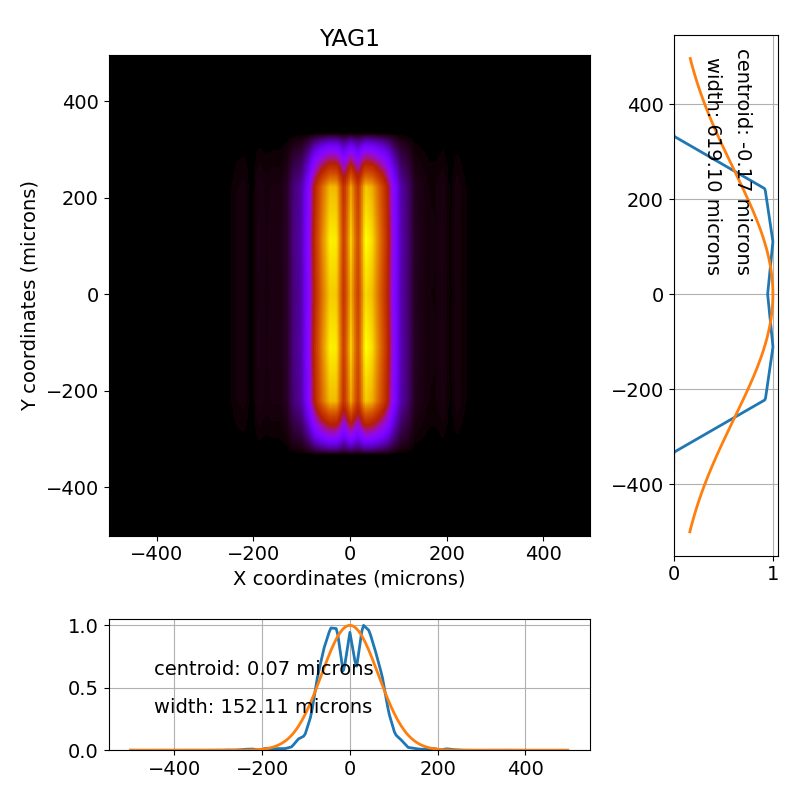

<IPython.core.display.Javascript object>


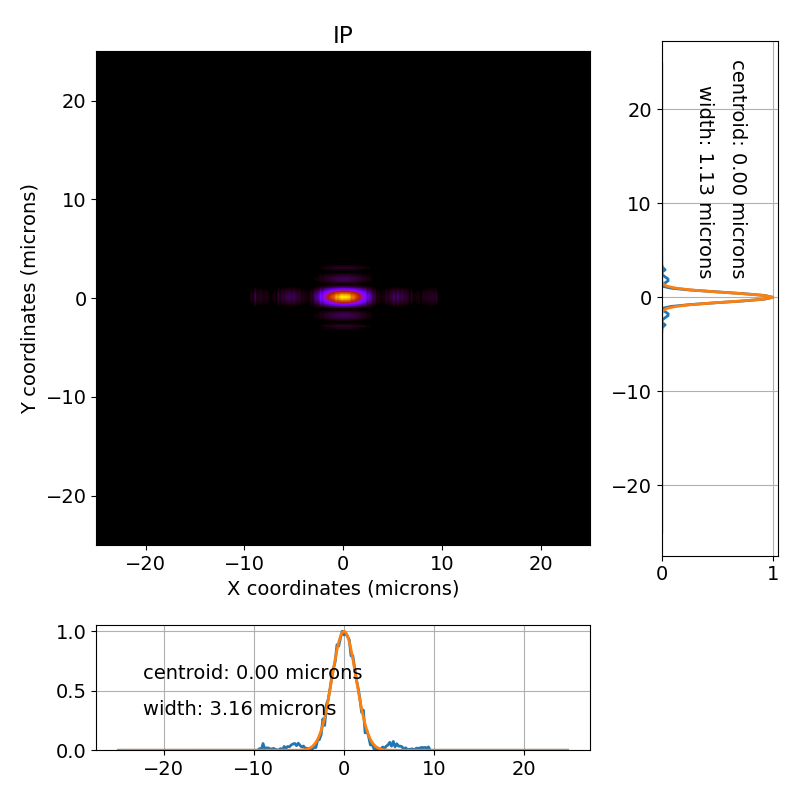

In [4]:
b2 = XPP.propagate_beamline(b1)
XPP.YAG1.view_beam()
XPP.IP.view_beam()
# XPP.YAG.view_beam()

In [11]:
beam_params['photonEnergy'] = 9500

pulse_test = beam.Pulse(beam_params=beam_params, tau=20, time_window=250)

In [12]:
pulse_test.propagate(beamline=XPP, screen_names=['YAG1','IP'])

FWHM in x: 359.9713292193522 microns
FWHM in y: 359.9713292193522 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415314482720531
5.415314482720531
x is focused
y is focused
mr1l0
zx: 110.00
zy: 110.00
drift1
zx: 117.29
zy: 117.29
mr2l0
zx: 117.29
zy: 117.29
drift2
x becomes unfocused
y becomes unfocused
zx: 360.00
zy: 360.00
c1
zx: 360.01
zy: 360.00
drift3
zx: 360.11
zy: 360.10
c2
zx: 249.15
zy: 360.10
drift4
x stays unfocused
y becomes focused
x stays unfocused
y remains focused
zx: 249.25
zy: 360.20
c3
y becomes unfocused
zx: 249.25
zy: 360.20
drift5
x stays unfocused
y becomes focused
x stays unfocused
y remains focused
zx: 249.35
zy: 360.30
c4
y becomes unfocused
zx: 172.52
zy: 360.30
drift6
x stays unfocused
y becomes focused
x stays unfocused
y remains focused
x becomes focused
y remains focused
zx: 172.72
zy: 360.50
crlx
x becomes unfocused
y becomes unfocused
focal length: 0.93
zx: -0.93
zy: 360.50
crly
focal length: 0.93
zx: -0.93
zy: -0.93
drift7
zx: -0

zx: 360.01
zy: 360.00
drift3
zx: 360.11
zy: 360.10
c2
zx: 249.15
zy: 360.10
drift4
x stays unfocused
y becomes focused
x stays unfocused
y remains focused
zx: 249.25
zy: 360.20
c3
y becomes unfocused
zx: 249.25
zy: 360.20
drift5
x stays unfocused
y becomes focused
x stays unfocused
y remains focused
zx: 249.35
zy: 360.30
c4
y becomes unfocused
zx: 172.52
zy: 360.30
drift6
x stays unfocused
y becomes focused
x becomes focused
y remains focused
zx: 172.72
zy: 360.50
crlx
x becomes unfocused
y becomes unfocused
focal length: 0.93
zx: -0.93
zy: 360.50
crly
focal length: 0.93
zx: -0.93
zy: -0.93
drift7
zx: -0.93
zy: -0.93
drift8
zx: -0.83
zy: -0.83
slit
zx: -0.83
zy: -0.83
drift9
x stays unfocused
y becomes focused
x becomes focused
y remains focused
zx: -0.00
zy: 0.00
IP
zx: -0.00
zy: 0.00
drift10
x remains focused
y becomes unfocused
x becomes unfocused
y stays unfocused
zx: 5.37
zy: 5.37
YAG1
zx: 5.37
zy: 5.37
FWHM in x: 359.9667723218044 microns
FWHM in y: 359.9667723218044 microns
FWHM

y becomes unfocused
zx: 172.52
zy: 360.30
drift6
x stays unfocused
y becomes focused
x stays unfocused
y remains focused
x becomes focused
y remains focused
zx: 172.72
zy: 360.50
crlx
x becomes unfocused
y becomes unfocused
focal length: 0.93
zx: -0.93
zy: 360.50
crly
focal length: 0.93
zx: -0.93
zy: -0.93
drift7
zx: -0.93
zy: -0.93
drift8
zx: -0.83
zy: -0.83
slit
zx: -0.83
zy: -0.83
drift9
x stays unfocused
y becomes focused
x becomes focused
y remains focused
zx: -0.00
zy: 0.00
IP
zx: -0.00
zy: 0.00
drift10
x remains focused
y becomes unfocused
x becomes unfocused
y stays unfocused
zx: 5.37
zy: 5.37
YAG1
zx: 5.37
zy: 5.37
FWHM in x: 359.96286650178007 microns
FWHM in y: 359.96286650178007 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415442105191941
5.415442105191941
x is focused
y is focused
mr1l0
zx: 110.00
zy: 110.00
drift1
zx: 117.29
zy: 117.29
mr2l0
zx: 117.29
zy: 117.29
drift2
x becomes unfocused
y becomes unfocused
zx: 360.00
zy: 360.00
c1
zx: 360.01
zy

zx: 360.01
zy: 360.00
drift3
zx: 360.11
zy: 360.10
c2
zx: 249.15
zy: 360.10
drift4
x stays unfocused
y becomes focused
x stays unfocused
y remains focused
zx: 249.25
zy: 360.20
c3
y becomes unfocused
zx: 249.26
zy: 360.20
drift5
x stays unfocused
y becomes focused
x stays unfocused
y remains focused
zx: 249.36
zy: 360.30
c4
y becomes unfocused
zx: 172.52
zy: 360.30
drift6
x stays unfocused
y becomes focused
x stays unfocused
y remains focused
x becomes focused
y remains focused
zx: 172.72
zy: 360.50
crlx
x becomes unfocused
y becomes unfocused
focal length: 0.93
zx: -0.93
zy: 360.50
crly
focal length: 0.93
zx: -0.93
zy: -0.93
drift7
zx: -0.93
zy: -0.93
drift8
zx: -0.83
zy: -0.83
slit
zx: -0.83
zy: -0.83
drift9
x stays unfocused
y stays unfocused
x stays unfocused
y becomes focused
x becomes focused
y remains focused
zx: -0.00
zy: 0.00
IP
zx: -0.00
zy: 0.00
drift10
x remains focused
y becomes unfocused
x becomes unfocused
y stays unfocused
zx: 5.37
zy: 5.37
YAG1
zx: 5.37
zy: 5.37
FWHM i

y becomes unfocused
zx: 172.52
zy: 360.30
drift6
x stays unfocused
y becomes focused
x becomes focused
y remains focused
zx: 172.72
zy: 360.50
crlx
x becomes unfocused
y becomes unfocused
focal length: 0.93
zx: -0.93
zy: 360.50
crly
focal length: 0.93
zx: -0.93
zy: -0.93
drift7
zx: -0.93
zy: -0.93
drift8
zx: -0.83
zy: -0.83
slit
zx: -0.83
zy: -0.83
drift9
x stays unfocused
y becomes focused
x becomes focused
y remains focused
zx: -0.00
zy: 0.00
IP
zx: -0.00
zy: 0.00
drift10
x remains focused
y becomes unfocused
x becomes unfocused
y stays unfocused
zx: 5.37
zy: 5.37
YAG1
zx: 5.37
zy: 5.37
FWHM in x: 359.9544041835522 microns
FWHM in y: 359.9544041835522 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415569727663353
5.415569727663353
x is focused
y is focused
mr1l0
zx: 110.00
zy: 110.00
drift1
zx: 117.29
zy: 117.29
mr2l0
zx: 117.29
zy: 117.29
drift2
x becomes unfocused
y becomes unfocused
zx: 360.00
zy: 360.00
c1
zx: 360.01
zy: 360.00
drift3
zx: 360.11
zy: 360.10


In [14]:
80/200

0.4

<IPython.core.display.Javascript object>


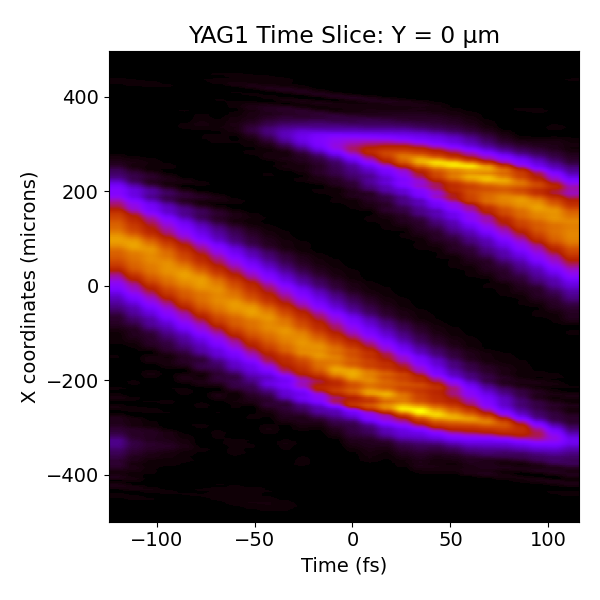

128


<IPython.core.display.Javascript object>


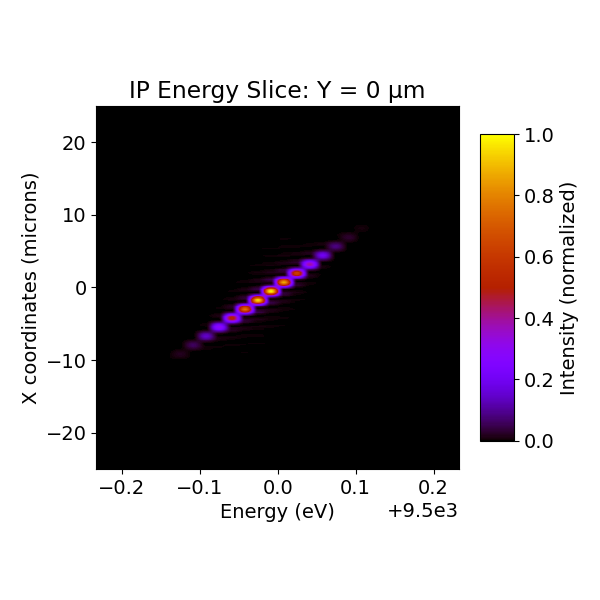

<IPython.core.display.Javascript object>


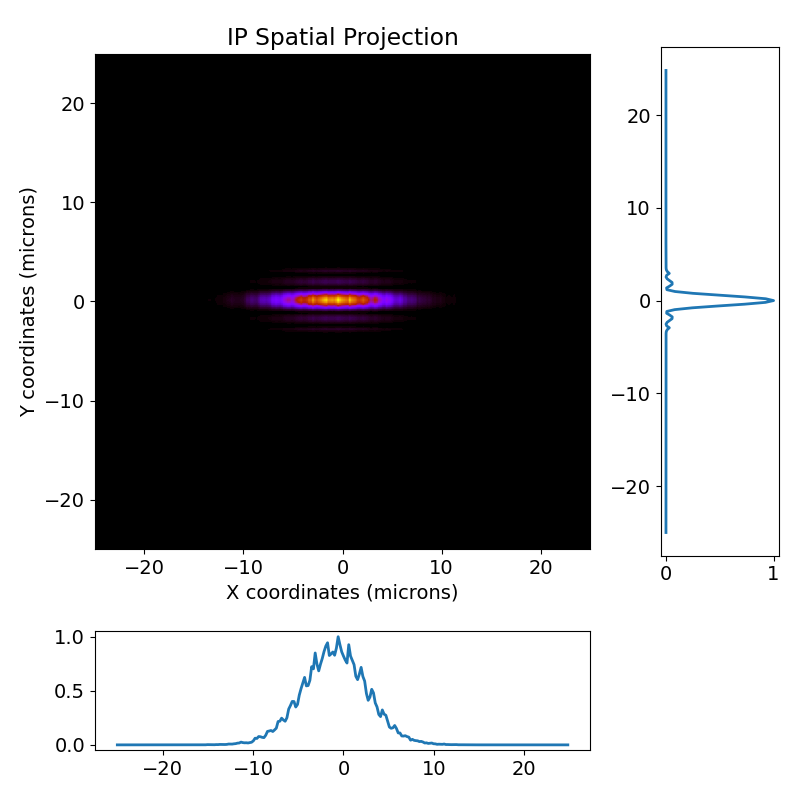

<IPython.core.display.Javascript object>


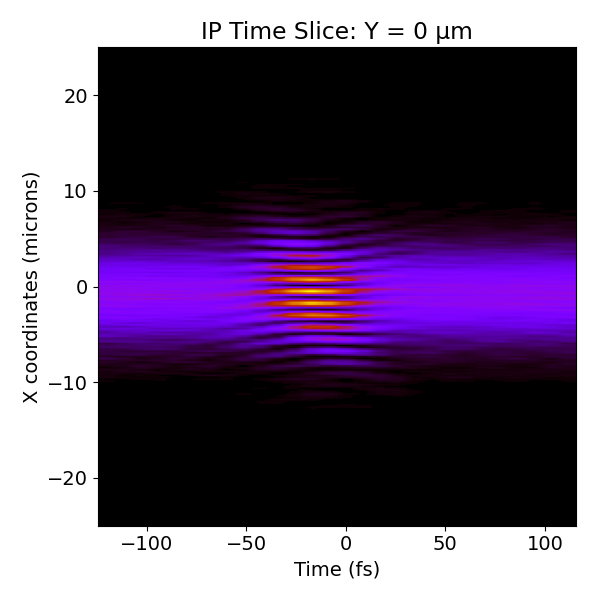

128


In [13]:
pulse_test.imshow_time_slice('YAG1')
pulse_test.imshow_energy_slice('IP')
pulse_test.imshow_projection('IP')
pulse_test.imshow_time_slice('IP')

In [8]:
(760-343)/180

2.316666666666667

In [33]:
(430-70)/350

1.0285714285714285

In [38]:
(430-90)/300

1.1333333333333333

In [16]:
(90+170)/480

0.5416666666666666

In [21]:
(680-512)/60

2.8